In [21]:
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

In [22]:
p = r'C:\Users\Donald\results_hyperparameter_testing.pkl'

with open(p, 'rb') as f:
    dfs_t = pickle.load(f)

In [23]:
def mean_avg_precision(df):    
    MAP = 0

    for i in range(len(df)):
        row = df.iloc[i]

        MAP += row['AP']

    MAP = MAP/len(df)

    return MAP

In [437]:
df_list[-1]

0

In [446]:
for jj, df_list in enumerate(dfs_t):
    print(jj)
    for i, df in enumerate(df_list):
        if type(df) == int:
            print(df)
            print('AHHHHHHHHH')
        else:
            pass
            #print(taus[i])
            #print(df[['TP', 'FP', 'FN']])
            #print(df['pth_model'][0])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
0
AHHHHHHHHH
0
AHHHHHHHHH
0
AHHHHHHHHH
0
AHHHHHHHHH
74
0
AHHHHHHHHH
0
AHHHHHHHHH
0
AHHHHHHHHH
0
AHHHHHHHHH
75
0
AHHHHHHHHH
0
AHHHHHHHHH
0
AHHHHHHHHH
76
0
AHHHHHHHHH
0
AHHHHHHHHH
0
AHHHHHHHHH
0
AHHHHHHHHH
77
0
AHHHHHHHHH
78
79
0
AHHHHHHHHH
0
AHHHHHHHHH
0
AHHHHHHHHH
80
81
0
AHHHHHHHHH
82
83
84
85
0
AHHHHHHHHH
86
0
AHHHHHHHHH
0
AHHHHHHHHH
0
AHHHHHHHHH
0
AHHHHHHHHH
87
0
AHHHHHHHHH
0
AHHHHHHHHH
0
AHHHHHHHHH
0
AHHHHHHHHH
88
89
0
AHHHHHHHHH
0
AHHHHHHHHH
0
AHHHHHHHHH
0
AHHHHHHHHH
90
0
AHHHHHHHHH
0
AHHHHHHHHH
0
AHHHHHHHHH
0
AHHHHHHHHH
91
0
AHHHHHHHHH
0
AHHHHHHHHH
0
AHHHHHHHHH
0
AHHHHHHHHH
92
93
0
AHHHHHHHHH
0
AHHHHHHHHH
0
AHHHHHHHHH
94
95
0
AHHHHHHHHH
0
AHHHHHHHHH
0
AHHHHHHHHH
0
AHHHHHHHHH


In [53]:
model_mAPs = []
pth_models = []
for df_list in dfs_t:
    mAPs = []
    pth_models.append(df_list[0]['pth_model'][0])
    for df in df_list:
        if type(df) != int:
            # print(df.iloc[0]['Tau'])
            #df.head()
            mAP = mean_avg_precision(df)
            # print(mAP)
            mAPs.append(mAP)
        else:
            mAPs.append(0)
    model_mAPs.append(mAPs)

In [54]:
print(len(model_mAPs))
print(len(pth_models))

96
96


In [26]:
model_mAPs[0]

[0.6497455474443673,
 0.5766752438649796,
 0.4533550150533056,
 0.27279020411182797,
 0.04932570569300726]

In [27]:
taus = [0.5, 0.6, 0.7, 0.8, 0.9]

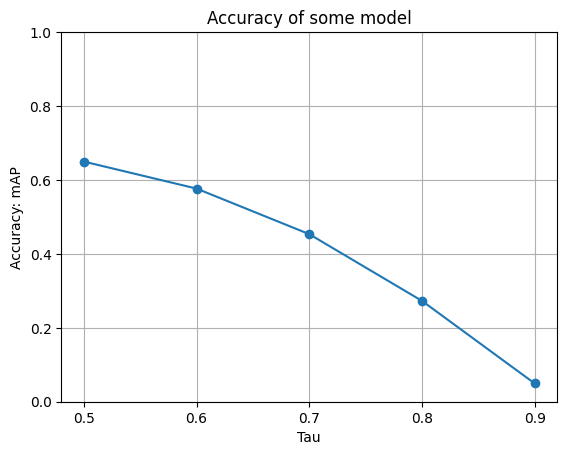

In [28]:
plt.plot(taus, model_mAPs[0], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Tau')
plt.ylabel('Accuracy: mAP')
plt.title('Accuracy of some model')
plt.xticks(taus)
plt.ylim(0, 1)
plt.grid('on')

# Display the plot
plt.show()

In [29]:
model_mAPs

[[0.6497455474443673,
  0.5766752438649796,
  0.4533550150533056,
  0.27279020411182797,
  0.04932570569300726],
 [0.6474682934117701,
  0.5737838326820074,
  0.4524243366434354,
  0.2635759192890016,
  0.031821769237044974],
 [0.641020398339668,
  0.5642556614971083,
  0.44809664326075715,
  0.26449014004350296,
  0.03779779041544386],
 [0.64502660271505,
  0.5693088756168806,
  0.4548439048436756,
  0.2562886939117379,
  0.03808546611855219],
 [0.6468098383022293,
  0.5684510930778914,
  0.4481990923943563,
  0.2647719056227213,
  0.040105395971536666],
 [0.6393892458895107,
  0.568579430937665,
  0.44884579559536963,
  0.26246777790328985,
  0.03537693365673645],
 [0.6332431840382917,
  0.5637387482728005,
  0.44245287320964394,
  0.255027879278478,
  0.03296641127129512],
 [0.6157881276502943,
  0.5330664534455867,
  0.4163726564918866,
  0.2361593300549824,
  0.03461129225250334],
 [0.6443463297348132,
  0.5732712715815814,
  0.46089788795307346,
  0.27598753270995086,
  0.0436177

In [30]:
aucs = []
means=[]

for i, mAPs in enumerate(model_mAPs):
    if mAPs != 0:
        area_under_curve = integrate.trapz(mAPs, taus)
        mean = np.mean(mAPs)
    else:
        area_under_curve = 0
        mean = 0
    print(f"Area under the curve: {area_under_curve}")
    aucs.append(area_under_curve)
    print(f'Mean value on curve: {mean}\n')
    means.append(mean)

Area under the curve: 0.16523560895988007
Mean value on curve: 0.40037834323349764

Area under the curve: 0.1629429119938852
Mean value on curve: 0.39381483025265196

Area under the curve: 0.16162515391789242
Mean value on curve: 0.39113212671129605

Area under the curve: 0.16219975087890953
Mean value on curve: 0.3927107086411793

Area under the curve: 0.1624879708231852
Mean value on curve: 0.39366746507374706

Area under the curve: 0.16172760942094483
Mean value on curve: 0.39093183679651433

Area under the curve: 0.15943242984157158
Mean value on curve: 0.38548581921410185

Area under the curve: 0.15107981499438547
Mean value on curve: 0.3671995719790507

Area under the curve: 0.16541387183968648
Mean value on curve: 0.3996241489098248

Area under the curve: 0.16539890545996733
Mean value on curve: 0.3995363846115184

Area under the curve: 0.16073661387708582
Mean value on curve: 0.3882349746526558

Area under the curve: 0.16086221364438616
Mean value on curve: 0.387566707427248

A

In [31]:
means

[0.40037834323349764,
 0.39381483025265196,
 0.39113212671129605,
 0.3927107086411793,
 0.39366746507374706,
 0.39093183679651433,
 0.38548581921410185,
 0.3671995719790507,
 0.3996241489098248,
 0.3995363846115184,
 0.3882349746526558,
 0.387566707427248,
 0.37924517961348897,
 0.3764615022170199,
 0.39185830965430946,
 0.39120264947913086,
 0.38291865733890573,
 0.3660491963340501,
 0.391238152119464,
 0.3872537236098663,
 0.36306177572956083,
 0.3739806763624898,
 0.38827924028155547,
 0.3673021968530255,
 0.4062890570772468,
 0.3839387404314357,
 0.3903395391224147,
 0.3848440890657262,
 0.4018676694487997,
 0.38039512960053773,
 0.39374565082375274,
 0.3924886446663874,
 0.4011248664989804,
 0.38224087523968087,
 0.40522291203064925,
 0.3831953090931294,
 0.3741992211931532,
 0.38333909320513376,
 0.3834182930380088,
 0.401857283320349,
 0.4086957159539037,
 0.3852276320756518,
 0.39534874280523213,
 0.3826472300195142,
 0.3911122764637446,
 0.3930849009337948,
 0.3866675981495356

In [32]:
len(means)

96

In [56]:
print(len(model_mAPs))
print(len(pth_models))

96
96


In [62]:
pth_models[0].split('_')

['monkey',
 '12',
 '12',
 '2023',
 'lr',
 '0.0005',
 'epochs',
 '100',
 'pt',
 '10',
 'gaus',
 'ratio',
 '0']

In [74]:
lrs_list = []
epochs_list = []
patience_list = []
gaus_ratio_list = []

for pth in pth_models:
    lr = pth.split('_')[5]
    lrs_list.append(lr)
    epochs = pth.split('_')[7]
    epochs_list.append(epochs)
    patience = pth.split('_')[9]
    patience_list.append(patience)
    gaus_ratio = pth.split('_')[12]
    gaus_ratio_list.append(gaus_ratio)
    
    print(lr,epochs,patience,gaus_ratio)

0.0005 100 10 0
0.0005 100 10 0.1
0.0005 100 20 0
0.0005 100 20 0.1
0.0005 100 30 0
0.0005 100 30 0.1
0.0005 100 40 0
0.0005 100 40 0.1
0.0005 200 10 0
0.0005 200 10 0.1
0.0005 200 20 0
0.0005 200 20 0.1
0.0005 200 30 0
0.0005 200 30 0.1
0.0005 200 40 0
0.0005 200 40 0.1
0.0005 400 10 0
0.0005 400 10 0.1
0.0005 400 20 0
0.0005 400 20 0.1
0.0005 400 30 0
0.0005 400 30 0.1
0.0005 400 40 0
0.0005 400 40 0.1
0.001 100 10 0
0.001 100 10 0.1
0.001 100 20 0
0.001 100 20 0.1
0.001 100 30 0
0.001 100 30 0.1
0.001 100 40 0
0.001 100 40 0.1
0.001 200 10 0
0.001 200 10 0.1
0.001 200 20 0
0.001 200 20 0.1
0.001 200 30 0
0.001 200 30 0.1
0.001 200 40 0
0.001 200 40 0.1
0.001 400 10 0
0.001 400 10 0.1
0.001 400 20 0
0.001 400 20 0.1
0.001 400 30 0
0.001 400 30 0.1
0.001 400 40 0
0.001 400 40 0.1
0.003 100 10 0
0.003 100 10 0.1
0.003 100 20 0
0.003 100 20 0.1
0.003 100 30 0
0.003 100 30 0.1
0.003 100 40 0
0.003 100 40 0.1
0.003 200 10 0
0.003 200 10 0.1
0.003 200 20 0
0.003 200 20 0.1
0.003 200 30 0
0

In [87]:
lr_options = list(np.unique(lrs_list))
epochs_options = list(np.unique(epochs_list))
patience_options = list(np.unique(patience_list))
gaus_ratio_options = list(np.unique(gaus_ratio_list))

In [88]:
print(lr_options)
print(epochs_options)
print(patience_options)
print(gaus_ratio_options)

['0.0005', '0.001', '0.003', '0.005']
['100', '200', '400']
['10', '20', '30', '40']
['0', '0.1']


In [137]:
total = len(lr_options)*len(epochs_options)*len(patience_options)*len(gaus_ratio_options)
epochs_offset = total/len(gaus_ratio_options)/len(epochs_options)/len(lr_options)

def get_xy_for_heatmap(lr, epochs, patience):
    pt = str(patience)
    epochs = str(epochs)
    lr = str(lr)
    
    epoch_section = epochs_options.index(epochs)
    lr_section = lr_options.index(lr)
    
    x = epochs_offset*epoch_section+lr_section
    y = patience_options[::-1].index(pt)
    
    return int(x),int(y)

In [142]:
gaus_0_table = np.zeros(shape=(len(patience_options), len(lr_options)*len(epochs_options)))
gaus_1_table = np.zeros(shape=(len(patience_options), len(lr_options)*len(epochs_options)))

for i in range(len(pth_models)):
    pth = pth_models[i]
    mean = means[i]
    
    lr = pth.split('_')[5]
    epochs = pth.split('_')[7]
    patience = pth.split('_')[9]
    gaus_ratio = pth.split('_')[12]
    
    print(lr,epochs,patience,gaus_ratio)
    
    if gaus_ratio == '0':
        x,y = get_xy_for_heatmap(lr, epochs, patience)
        print(x,y)
        gaus_0_table[y,x] = mean
    else:
        x,y = get_xy_for_heatmap(lr, epochs, patience)
        print(x,y)
        gaus_1_table[y,x] = mean

0.0005 100 10 0
0 3
0.0005 100 10 0.1
0 3
0.0005 100 20 0
0 2
0.0005 100 20 0.1
0 2
0.0005 100 30 0
0 1
0.0005 100 30 0.1
0 1
0.0005 100 40 0
0 0
0.0005 100 40 0.1
0 0
0.0005 200 10 0
4 3
0.0005 200 10 0.1
4 3
0.0005 200 20 0
4 2
0.0005 200 20 0.1
4 2
0.0005 200 30 0
4 1
0.0005 200 30 0.1
4 1
0.0005 200 40 0
4 0
0.0005 200 40 0.1
4 0
0.0005 400 10 0
8 3
0.0005 400 10 0.1
8 3
0.0005 400 20 0
8 2
0.0005 400 20 0.1
8 2
0.0005 400 30 0
8 1
0.0005 400 30 0.1
8 1
0.0005 400 40 0
8 0
0.0005 400 40 0.1
8 0
0.001 100 10 0
1 3
0.001 100 10 0.1
1 3
0.001 100 20 0
1 2
0.001 100 20 0.1
1 2
0.001 100 30 0
1 1
0.001 100 30 0.1
1 1
0.001 100 40 0
1 0
0.001 100 40 0.1
1 0
0.001 200 10 0
5 3
0.001 200 10 0.1
5 3
0.001 200 20 0
5 2
0.001 200 20 0.1
5 2
0.001 200 30 0
5 1
0.001 200 30 0.1
5 1
0.001 200 40 0
5 0
0.001 200 40 0.1
5 0
0.001 400 10 0
9 3
0.001 400 10 0.1
9 3
0.001 400 20 0
9 2
0.001 400 20 0.1
9 2
0.001 400 30 0
9 1
0.001 400 30 0.1
9 1
0.001 400 40 0
9 0
0.001 400 40 0.1
9 0
0.003 100 10 0
2

In [410]:
dat = np.vstack([gaus_0_table,gaus_1_table])

In [411]:
import matplotlib.ticker as ticker

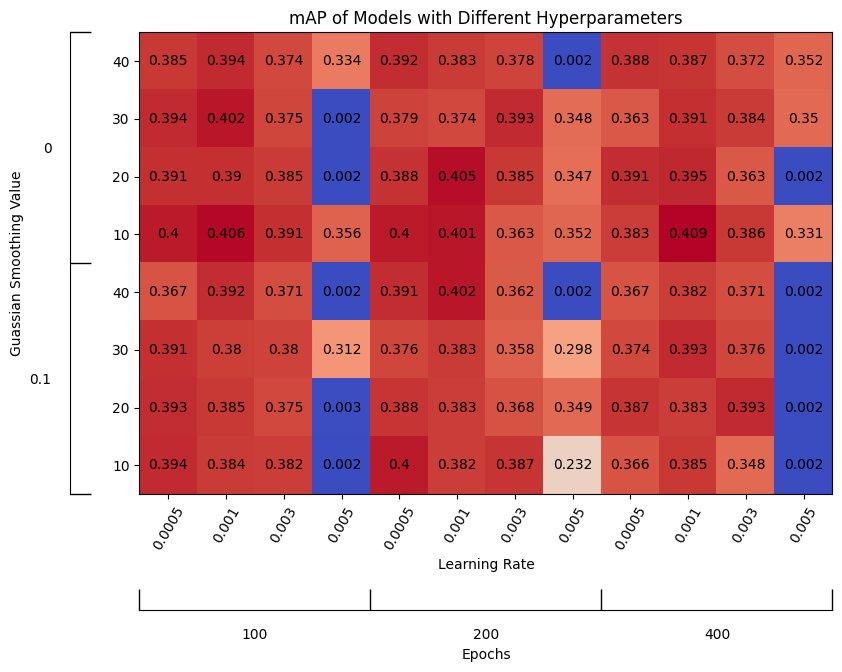

In [431]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.imshow(dat, cmap='coolwarm', interpolation='nearest')

x_labs = lr_options*3
y_labs = patience_options[::-1]*2

ax.set_xticks(np.arange(len(x_labs)))
ax.set_xticklabels(x_labs,rotation=60)

ax.set_yticks(np.arange(len(y_labs)))
ax.set_yticklabels(y_labs)
ax.set_xlabel('Learning Rate')

lab = ["100", "200", "300"]

#ax2 = ax.secondary_xaxis('bottom')
ax2 = ax.secondary_xaxis(-0.25)
ax2.tick_params('both', length=10, width=0, which='minor')
ax2.tick_params('both', direction='in', which='major', labelsize=10, width=1, length=15)
ax2.set_xticks([-.5, 3.5, 7.5, 11.5])
ax2.xaxis.set_major_formatter(ticker.NullFormatter())

ax2.xaxis.set_minor_locator(ticker.FixedLocator([1.5, 5.5, 9.5]))
ax2.xaxis.set_minor_formatter(ticker.FixedFormatter(['100', '200', '400']))

ax2.set_xlabel('Epochs')

ax3 = ax.secondary_yaxis(-0.10)
ax3.tick_params('both', length=10, width=0, which='minor')
ax3.tick_params('both', direction='in', which='major', labelsize=10, width=1, length=15)
ax3.set_yticks([-.5, 3.5, 7.5])
ax3.yaxis.set_major_formatter(ticker.NullFormatter())

ax3.yaxis.set_minor_locator(ticker.FixedLocator([1.5, 5.5]))
ax3.yaxis.set_minor_formatter(ticker.FixedFormatter(['0', '0.1']))

ax3.set_ylabel('Guassian Smoothing Value')


#ax2.xaxis.set_minor_locator(ticker.FixedLocator([-.5, 3.5, 7.5, 11.5]))
#ax2.xaxis.set_minor_formatter(ticker.FixedFormatter(['lab']))

#ax2.set_xticklabels(lab)
#ax2.set_position((0.2, 0.1))

#plt.xlabel('lr')

# Add annotations
for i in range(len(y_labs)):
    for j in range(len(x_labs)):
        text = ax.text(j, i, round(dat[i, j], 3), ha='center', va='center', color='black')



plt.title('mAP of Models with Different Hyperparameters')

plt.show()

In [304]:
"glue = sns.load_dataset("glue") #.pivot(index="Model", columns="Task", values="Score")
dat = pd.DataFrame(gaus_0_table) #.pivot(index="Model", columns="Task", values="Score")
glue

,Model,Year,Encoder,Task,Score
0,ERNIE,2019,Transformer,CoLA,75.5
1,T5,2019,Transformer,CoLA,71.6
2,RoBERTa,2019,Transformer,CoLA,67.8
3,BERT,2018,Transformer,CoLA,60.5
4,BiLSTM+ELMo,2018,LSTM,CoLA,32.1
...,...,...,...,...,...
59,BERT,2018,Transformer,RTE,70.1
60,BiLSTM+ELMo,2018,LSTM,RTE,57.4
61,BiLSTM+CoVe,2017,LSTM,RTE,52.7
62,BiLSTM+Attn,2017,LSTM,RTE,58.4


In [305]:
dat['Patience'] = np.array([40,30,20,10])
dat.pivot(columns='Patience')

0                                       1                      \
Patience        10        20        30        40        10       20        30   
0              NaN       NaN       NaN  0.385486       NaN      NaN       NaN   
1              NaN       NaN  0.393667       NaN       NaN      NaN  0.401868   
2              NaN  0.391132       NaN       NaN       NaN  0.39034       NaN   
3         0.400378       NaN       NaN       NaN  0.406289      NaN       NaN   

                          2             ...        9                   10  \
Patience        40        10        20  ...        30        40        10   
0         0.393746       NaN       NaN  ...       NaN  0.386668       NaN   
1              NaN       NaN       NaN  ...  0.391112       NaN       NaN   
2              NaN       NaN  0.384784  ...       NaN       NaN       NaN   
3              NaN  0.391007       NaN  ...       NaN       NaN  0.386343   

                                              11                                
Patience        20        30        40        10        20        30        40  
0              NaN       NaN  0.371858       NaN       NaN       NaN  0.351934  
1              NaN  0.384244       NaN       NaN       NaN  0.349666       NaN  
2         0.363464       NaN       NaN       NaN  0.001683       NaN       NaN  
3              NaN       NaN       NaN  0.331464       NaN       NaN       NaN  

[4 rows x 48 columns]

TypeError: '<' not supported between instances of 'ellipsis' and 'ellipsis'

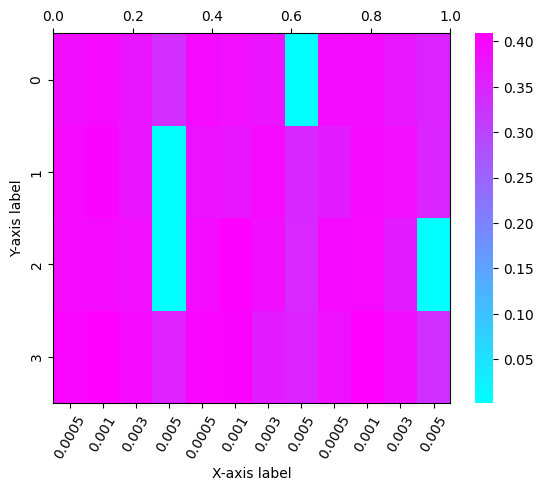

In [311]:
import seaborn as sns

dat = gaus_0_table
heatmap = sns.heatmap(dat,cmap='cool')
heatmap.set_xlabel('X-axis label')
heatmap.set_ylabel('Y-axis label')
heatmap.set_xticklabels(x_labs,rotation=60)

ax2 = plt.twiny()
new_x_labels = [...] # List of new x-axis labels
new_x_ticks = [...] # List of new x-axis tick positions

ax2.set_xticks(new_x_ticks)
ax2.set_xticklabels(new_x_labels, rotation=60)
ax2.set_xlabel('New X-axis label')

plt.show()


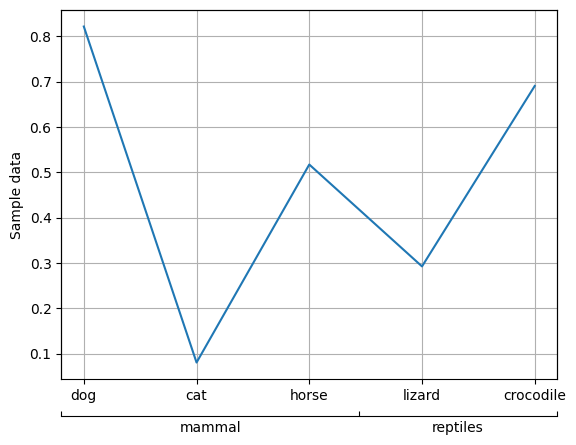

In [361]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig1, ax1 = plt.subplots(1)
# Some data
x = np.arange(1,6)
y = np.random.random(len(x))

# First X-axis
ax1.plot(x, y)
ax1.set_xticks(x)
ax1.set_xticklabels(['dog', 'cat', 'horse', 'lizard', 'crocodile'])
ax1.yaxis.set_label_text("Sample data")

# Second X-axis
ax2 = ax1.twiny()

ax2.spines["bottom"].set_position(("axes", -0.10))
ax2.tick_params('both', length=0, width=0, which='minor')
ax2.tick_params('both', direction='in', which='major')
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")
 
ax2.set_xticks([0.0, 0.6, 1.0])
ax2.xaxis.set_major_formatter(ticker.NullFormatter())
ax2.xaxis.set_minor_locator(ticker.FixedLocator([0.3, 0.8]))
ax2.xaxis.set_minor_formatter(ticker.FixedFormatter(['mammal', 'reptiles']))

# Third X-axis
# ax3 = ax1.twiny()
# 
# ax3.spines["bottom"].set_position(("axes", -0.20))
# ax3.tick_params('both', length=0, width=0, which='minor')
# ax3.tick_params('both', direction='in', which='major')
# ax3.xaxis.set_ticks_position("bottom")
# ax3.xaxis.set_label_position("bottom")
# 
# ax3.set_xticks([0.0, 1.0])
# ax3.xaxis.set_major_formatter(ticker.NullFormatter())
# ax3.xaxis.set_minor_locator(ticker.FixedLocator([0.5]))
# ax3.xaxis.set_minor_formatter(ticker.FixedFormatter(['vertebrates']))

ax1.grid(True)
plt.show()

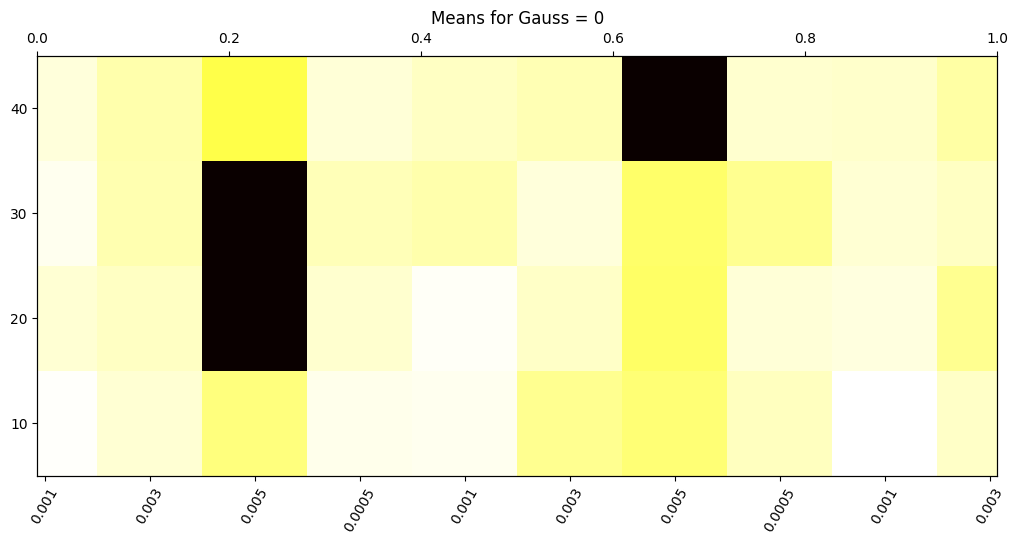

In [235]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.imshow(gaus_0_table, cmap='hot', interpolation='nearest')

x_labs = lr_options*3
y_labs = patience_options[::-1]

ax.set_xticks(np.arange(len(x_labs)))
ax.set_xticklabels(x_labs,rotation=60)

ax.set_yticks(np.arange(len(y_labs)))
ax.set_yticklabels(y_labs)

# Second X-axis
ax2 = ax.twiny()
# ax2.set_xlim(ax.get_xlim())
# ax2.set_xticks(np.arange(len(x_labs)))
# ax2.set_xticks(np.arange(len(x_labs)))

#plt.xlabel('lr')
#plt.ylabel('Patience')
plt.title('Means for Gauss = 0')
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.9)

plt.show()

In [ ]:
# ax2.spines["bottom"].set_position(("axes", -0.2))
# ax2.tick_params('both', length=0, width=0, which='minor')
# ax2.tick_params('both', direction='in', which='major')
# ax2.xaxis.set_ticks_position("bottom")
# ax2.xaxis.set_label_position("bottom")
# 
# ax2.set_xticks([0.0, 0.33, 0.66,10])
# ax2.xaxis.set_major_formatter(ticker.NullFormatter())
# ax2.xaxis.set_minor_locator(ticker.FixedLocator([0.33/2, 0.66/2, 1/2]))
# ax2.xaxis.set_minor_formatter(ticker.FixedFormatter(['mammal', 'reptiles', 'hi']))


In [149]:
len(lr_options*3)

12

In [143]:
gaus_1_table

array([[0.36719957, 0.39248864, 0.37104334, 0.00214494, 0.39120265,
        0.40185728, 0.36202266, 0.00171228, 0.3673022 , 0.38222062,
        0.37060157, 0.00168982],
       [0.39093184, 0.38039513, 0.37997779, 0.31165803, 0.3764615 ,
        0.38333909, 0.35763448, 0.29796048, 0.37398068, 0.3930849 ,
        0.3761569 , 0.00180747],
       [0.39271071, 0.38484409, 0.37462854, 0.00328001, 0.38756671,
        0.38319531, 0.36762373, 0.34939488, 0.38725372, 0.38264723,
        0.393093  , 0.0015502 ],
       [0.39381483, 0.38393874, 0.3823007 , 0.00154765, 0.39953638,
        0.38224088, 0.38696189, 0.2321614 , 0.3660492 , 0.38522763,
        0.34833523, 0.00153868]])

In [117]:
epochs_offset

4.0

In [93]:
patience_options[::-1].index('10')

0

In [111]:
print(pt_offset)
print(epochs_offset)
print(gaus_ratio_offset)

24.0
8.0
4.0
